In [2]:
import pandas as pd
df = pd.read_csv("laptop_data.csv")
print(df)

     Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              Cpu_brand   HDD  SSD Gpu_brand   

# Предобработка данных


## Проверка на дубликаты:

In [3]:
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  1


In [4]:
df = df.drop_duplicates()
print("Кол-во дубликатов: ", df[df.duplicated()].shape[0])

Кол-во дубликатов:  0


## Проверка на None или NaN значения:

In [5]:
print(df.isnull().sum())

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


## String to int

In [6]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in ["Company", "TypeName", "Ram", "Cpu_brand", "Gpu_brand", "Os"]:
    df[i] = label.fit_transform(df[i])
display(df)

Company  TypeName  Ram  Weight      Price  TouchScreen  Ips         Ppi  \
0           1         4    3    1.37  11.175755            0    1  226.983005   
1           1         4    3    1.34  10.776777            0    0  127.677940   
2           7         3    3    1.86  10.329931            0    0  141.211998   
3           1         4    5    1.83  11.814476            0    1  220.534624   
4           1         4    3    1.37  11.473101            0    1  226.983005   
...       ...       ...  ...     ...        ...          ...  ...         ...   
1268        2         3    1    2.20  10.555257            0    0  100.454670   
1269       10         0    1    1.80  10.433899            1    1  157.350512   
1270       10         0    5    1.30  11.288115            1    1  276.053530   
1271       10         3    0    1.50   9.409283            0    0  111.935204   
1272        7         3    2    2.19  10.614129            0    0  100.454670   

      Cpu_brand   HDD  SSD  Gpu_brand  Os  
0             2     0  128          1   0  
1             2     0    0          1   0  
2             2     0  256          1   1  
3             3     0  512          0   0  
4             2     0  256          1   0  
...         ...   ...  ...        ...  ..  
1268          3   500    0          2   2  
1269          3     0  128          1   2  
1270          3     0  512          1   2  
1271          4     0    0          1   2  
1272          3  1000    0          0   2  

[1272 rows x 13 columns]

## Разделение признаков

In [7]:
categorical = ["Company", "TypeName", "Ram", "TouchScreen", "Ips", "Cpu_brand", "HDD", "SSD", "Gpu_brand", "Os"]
cont = []
for i in df.columns:
    if i not in categorical:
        cont.append(i)
cont

['Weight', 'Price', 'Ppi']

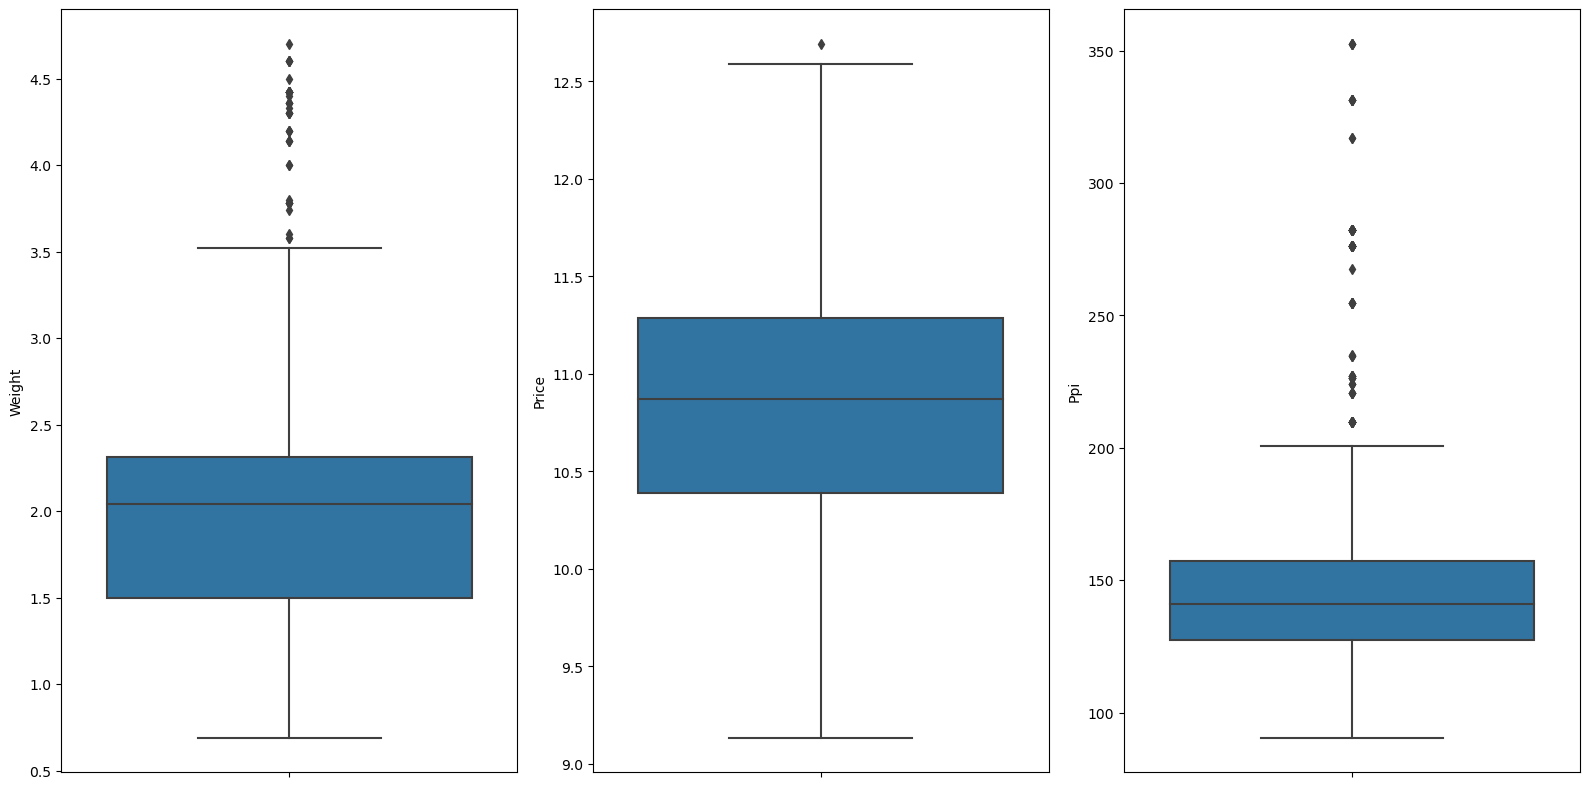

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

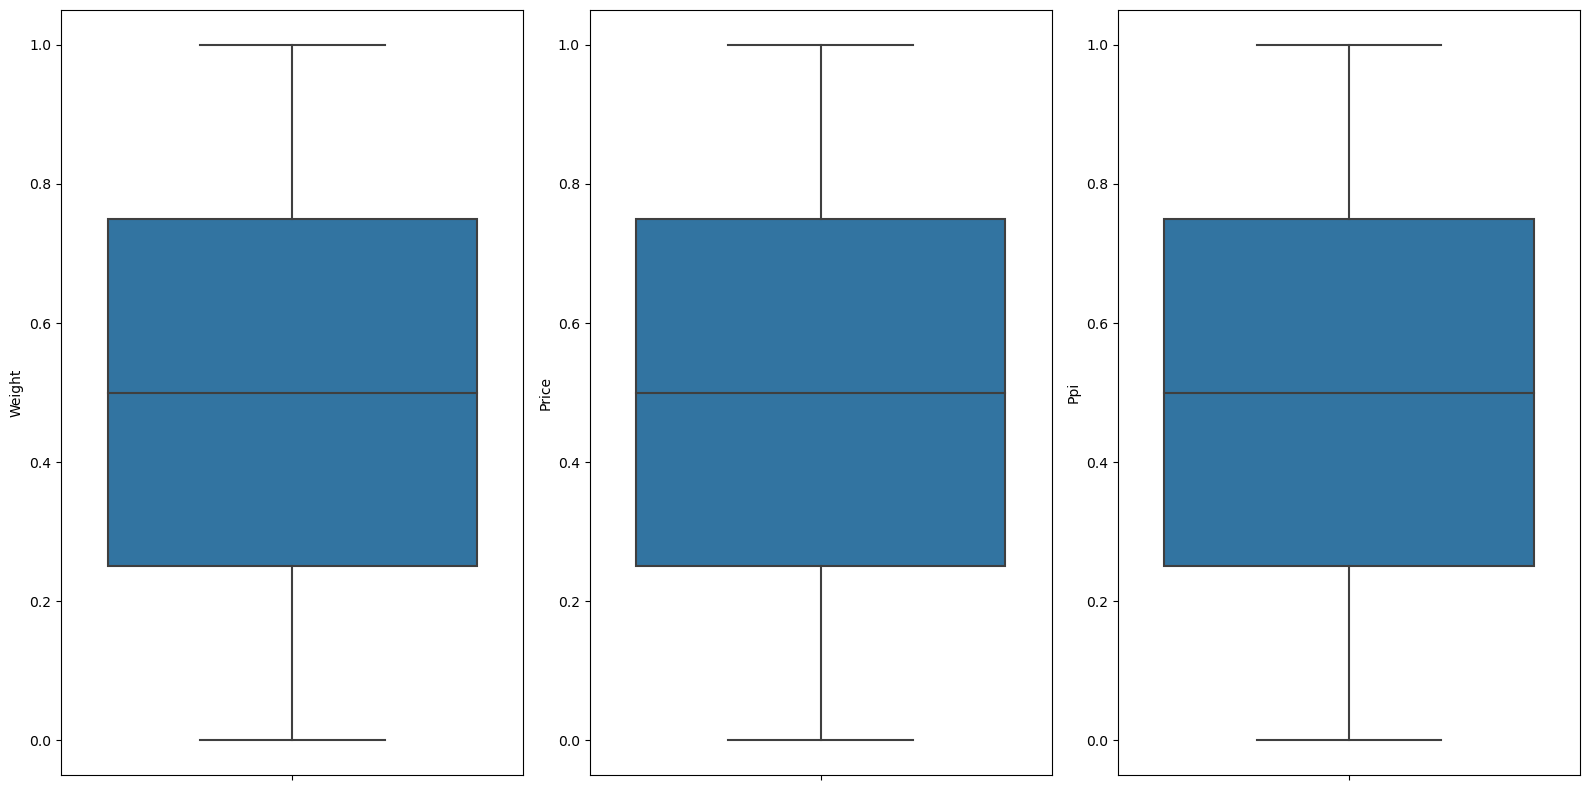

In [9]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=5, random_state=1)
df[cont] = qt.fit_transform(df[cont])

fig = plt.figure(figsize=(16, 8))
for i, name in enumerate(cont):
    ax = fig.add_subplot(1, len(cont), i+1)
    sns.boxplot(y = df[name], ax=ax)
fig.tight_layout()

## Матрица корреляций

<Axes: >

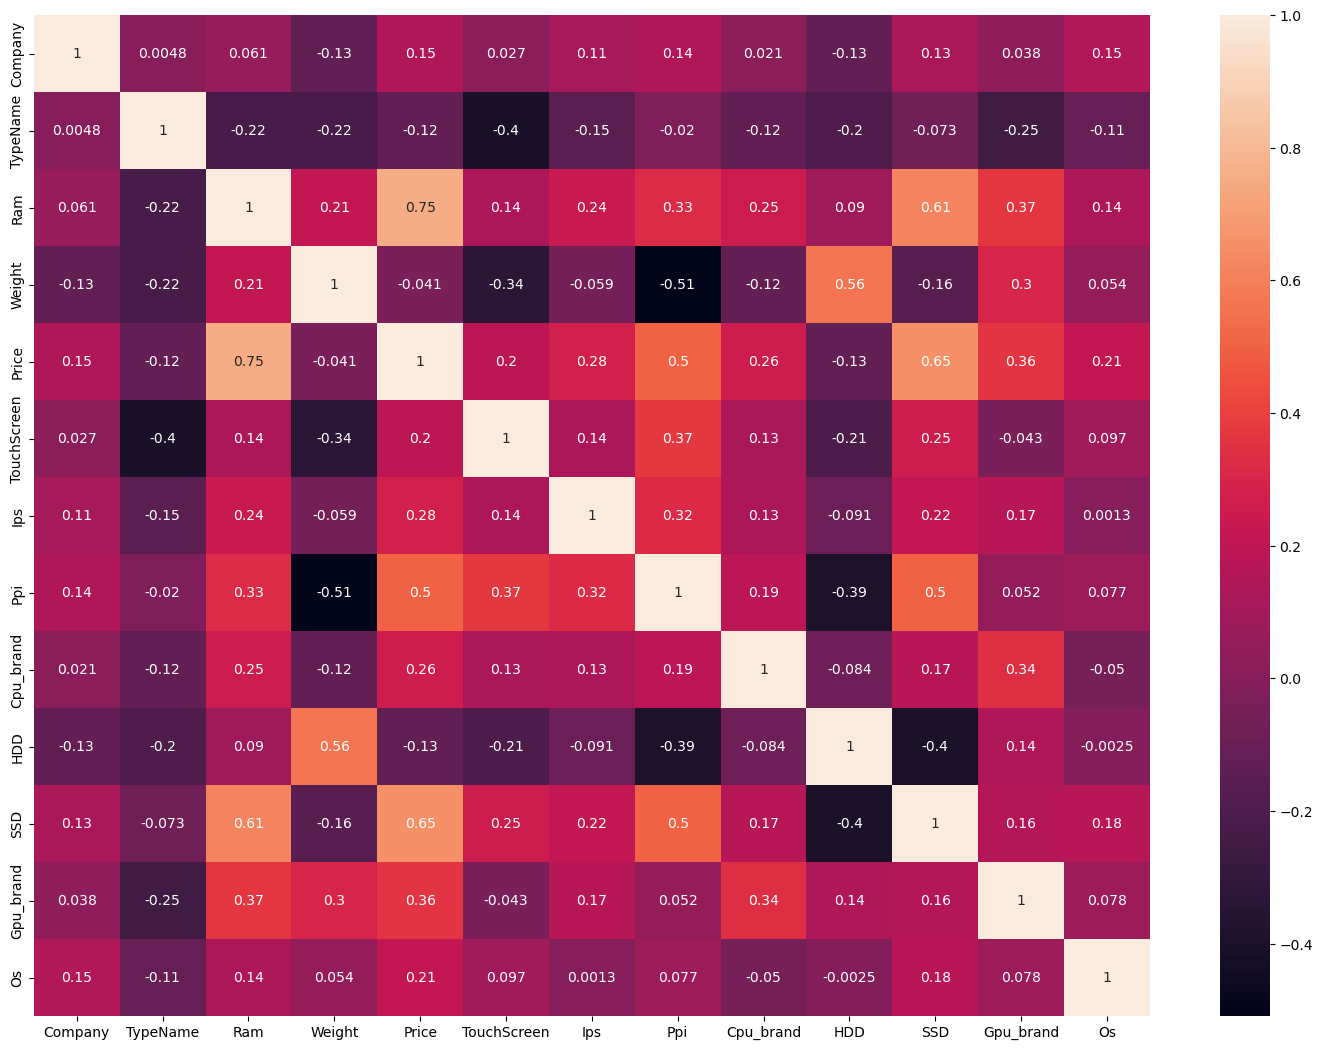

In [10]:
plt.figure(figsize = (18,13))
sns.heatmap(df.corr(), annot=True)

## Тренировочная и тестовая выборки

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(['Price'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)

(1017, 12)
(255, 12)


# Обучение моделей

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
def performance(y_test, y_pred):
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('R^2:', r2_score(y_test, y_pred))

## Линейная регрессия

Градиентным спуском минимизируется среднеквадратическое отклонение предсказанного значения ($w * x_i + b$) от настоящего ($y_i$):

$$MSE = \frac{1}{N} \sum_{i=1}^{n} (y_i - (w * x_i + b))$$

In [13]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11061042379849038
MSE: 0.018040002886528732
RMSE: 0.1343130778685707
R^2: 0.6935350966500964


Посмотрим на среднее значение целевого признака:

df['Price'].mean()

In [14]:
linear.intercept_

-0.07081546244862541

In [15]:
coefs_linear = linear.coef_
print(coefs_linear)

print(np.min(np.abs(coefs_linear)), np.max(np.abs(coefs_linear)))

[ 1.94358796e-03  1.08342822e-02  8.84275126e-02 -7.25753643e-02
 -3.80469860e-04  1.59287127e-02  1.68356023e-01  9.43444546e-04
  5.23716170e-06  2.37865757e-04  6.02495017e-02  6.21761050e-02]
5.237161700187912e-06 0.16835602310280404


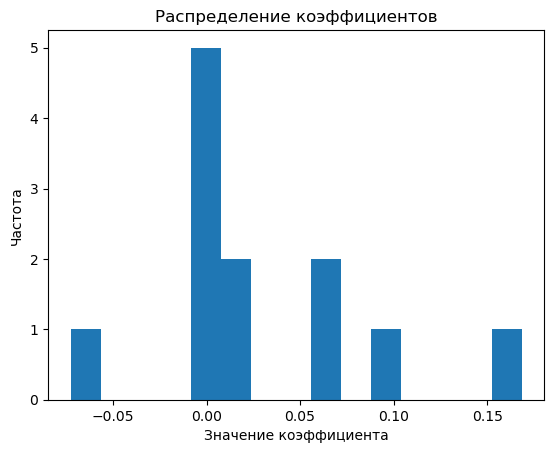

In [16]:
plt.hist(coefs_linear, bins=15)
plt.title("Распределение коэффициентов")
plt.xlabel("Значение коэффициента")
plt.ylabel("Частота")
plt.show()

## LASSO

В LASSO регрессии добавляется L1-регуляризация:

$$err = \frac{1}{n}\sum_{i=1}^n(y_i - (w * x_i + b)) + \alpha \sum_{i=1}^{d}|w_i|$$

где d -- число признаков

Сделаем коэффициент регуляризации сначала малым.

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001, random_state=1)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
performance(y_test, y_pred)

[ 1.97333119e-03  1.07782119e-02  8.83189332e-02 -6.98218160e-02
  0.00000000e+00  1.55671665e-02  1.67578855e-01  1.01160398e-03
  4.69981601e-06  2.39292450e-04  5.98225956e-02  6.14102899e-02]
MAE: 0.11056073903264135
MSE: 0.018016251262917803
RMSE: 0.13422462986694284
R^2: 0.6939385909887676


Увеличим коэффициент регуляризации.

In [18]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001, random_state=1)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
performance(y_test, y_pred)

[ 2.22926899e-03  9.78918746e-03  8.74380774e-02 -4.66765566e-02
  0.00000000e+00  1.22745106e-02  1.61265268e-01  1.63655183e-03
 -2.83852094e-07  2.52032358e-04  5.57555183e-02  5.46501054e-02]
MAE: 0.11017145923723107
MSE: 0.017854150927482333
RMSE: 0.13361942571154214
R^2: 0.6966923634767597


Один коэффициент занулился, найдем в интервале [0.0001, 0.001] коэффициент при котором MSE будет минимальным.

In [19]:
n_alphas = 1000
alphas = np.linspace(0.0001, 0.12, n_alphas)

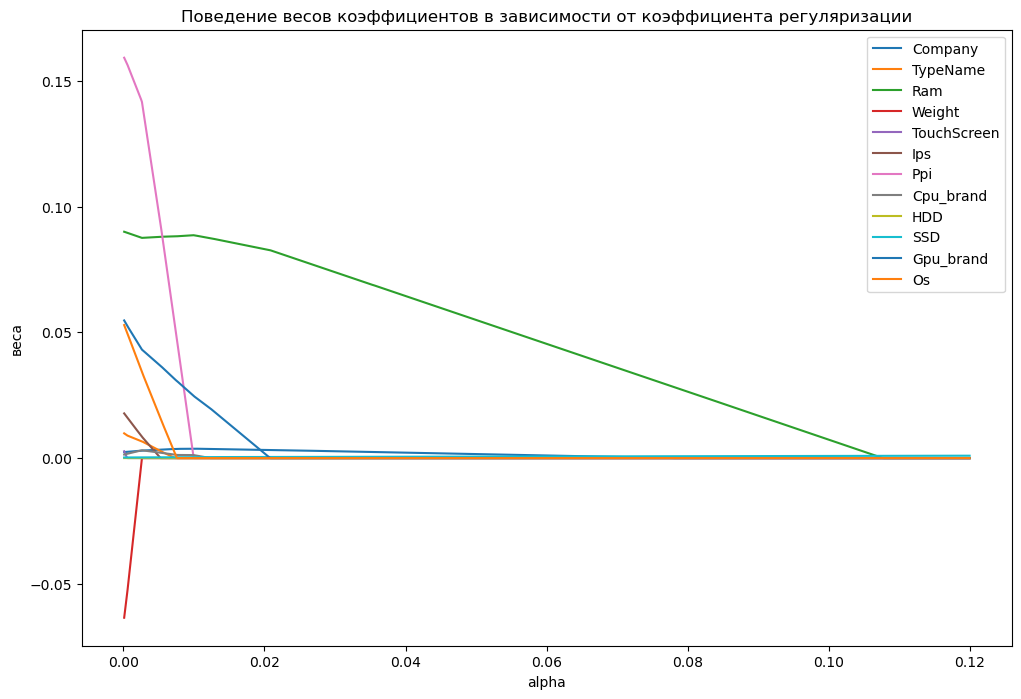

In [20]:
model = Lasso()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlabel("alpha")
plt.ylabel("веса")
plt.title("Поведение весов коэффициентов в зависимости от коэффициента регуляризации")
plt.legend(X.columns, loc='upper right')
plt.axis("tight")
plt.show();

In [21]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=1)
lasso_cv.fit(X_train, y_train);
lasso_cv.alpha_

0.00046006006006006004

In [22]:
lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

performance(y_test, y_pred)

MAE: 0.11039689950393225
MSE: 0.017942006342573816
RMSE: 0.133947774683172
R^2: 0.695199869187034


In [23]:
print(lasso.intercept_)
print(lasso.coef_)
print(np.min(np.abs(lasso.coef_)))
print(np.max(np.abs(lasso.coef_)))
print((lasso.coef_ == 0).sum())

-0.06545586627175254
[ 2.07579572e-03  1.03824225e-02  8.79656518e-02 -6.05518475e-02
  0.00000000e+00  1.42492258e-02  1.65053704e-01  1.26203238e-03
  2.70119141e-06  2.44389773e-04  5.81953816e-02  5.87056588e-02]
0.0
0.16505370404130168
1


In [24]:
X.columns[np.where(lasso.coef_ == 0)[0]]

Index(['TouchScreen'], dtype='object')

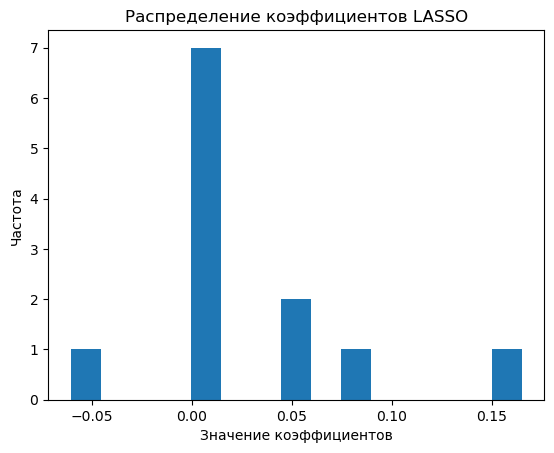

In [25]:
plt.hist(lasso.coef_, bins=15)
plt.title("Распределение коэффициентов LASSO")
plt.xlabel("Значение коэффициентов")
plt.ylabel("Частота")
plt.show()

## Ridge

Минимизация среднеквадратичной ошибки с L2-регуляризацией.

$$err = \frac{1}{n} \sum_{i=1}^{n} (y_i - w * x_i)^2 + \alpha \sum_{i=1}^{Nfeatures} w_i^2$$

In [26]:
from sklearn.linear_model import Ridge
rid = Ridge(random_state=1)
rid.fit(X_train, y_train)

y_pred = rid.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11054794274954347
MSE: 0.01801517020031983
RMSE: 0.13422060274160533
R^2: 0.6939569561601419


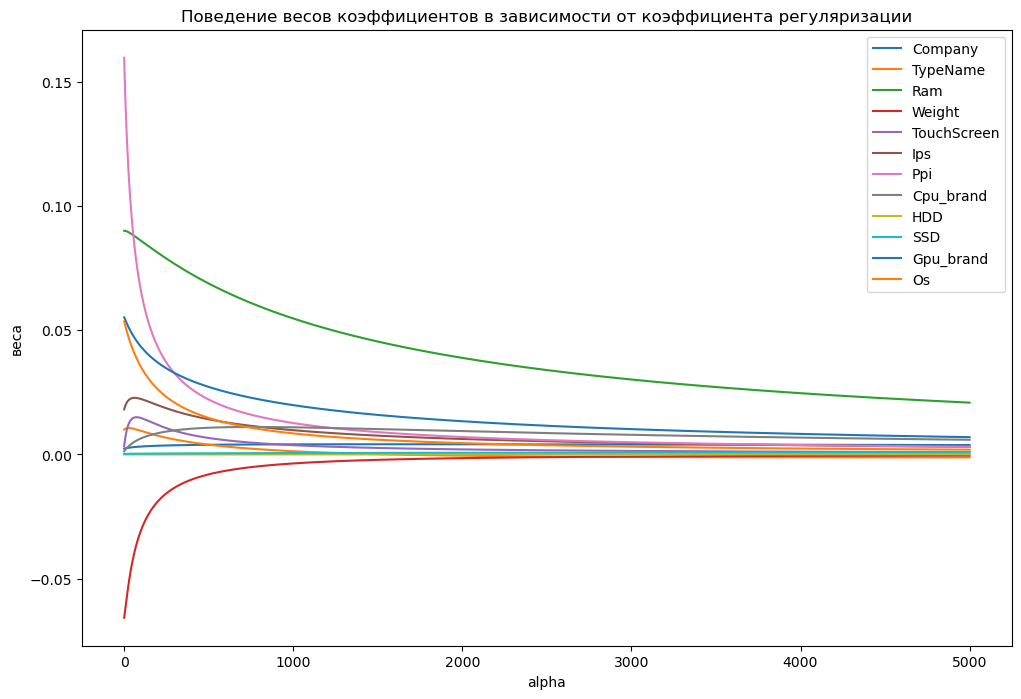

In [32]:
n_alphas = 1000
alphas = np.linspace(0.01, 5000, n_alphas)

model = Ridge()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlabel("alpha")
plt.ylabel("веса")
plt.title("Поведение весов коэффициентов в зависимости от коэффициента регуляризации")
plt.legend(X.columns, loc='upper right')
plt.axis("tight")
plt.show();

In [34]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train);
ridge_cv.alpha_

0.01

In [35]:
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

performance(y_test, y_pred)

MAE: 0.11060978856679665
MSE: 0.018039743951513962
RMSE: 0.1343121139417959
R^2: 0.6935394954572792


In [36]:
ridge.coef_

array([ 1.94386697e-03,  1.08351193e-02,  8.84275050e-02, -7.25677411e-02,
       -3.71566112e-04,  1.59323502e-02,  1.68320701e-01,  9.44617104e-04,
        5.23342971e-06,  2.37884597e-04,  6.02474425e-02,  6.21718701e-02])

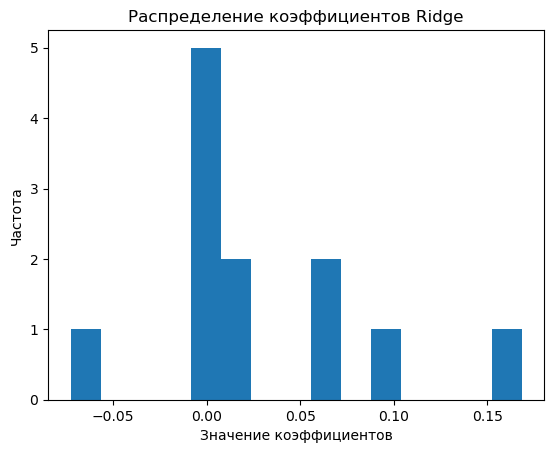

In [37]:
plt.hist(ridge.coef_, bins=15)
plt.title("Распределение коэффициентов Ridge")
plt.xlabel("Значение коэффициентов")
plt.ylabel("Частота")
plt.show()

## Elastic-Net

Ridge + Lasso

минимизирует сложность регрессионной модели (величину и число коэффициентов регрессии).
Штрафует модель как L2 так и L1 нормой.

$$err = \frac{1}{n}\sum_{i=1}^{n}(y_i - w * x_i)^2 + \alpha (\frac{1-\beta}{2}\sum_{i=1}^{Nfeatures}w_i^2 + \beta\sum_{i=1}^{Nfeatures}|w_i|)$$

In [39]:
from sklearn.linear_model import ElasticNet
el = ElasticNet(random_state=1)
el.fit(X_train, y_train)

y_pred = el.predict(X_test)
performance(y_pred, y_test)

MAE: 0.14755039945077303
MSE: 0.032057747121833464
RMSE: 0.1790467735588482
R^2: -0.014512901854545568


In [48]:
n_alphas = 1000
alphas = np.linspace(0.00001, 0.4, n_alphas)
l1s = np.linspace(0.01, 0, n_alphas)



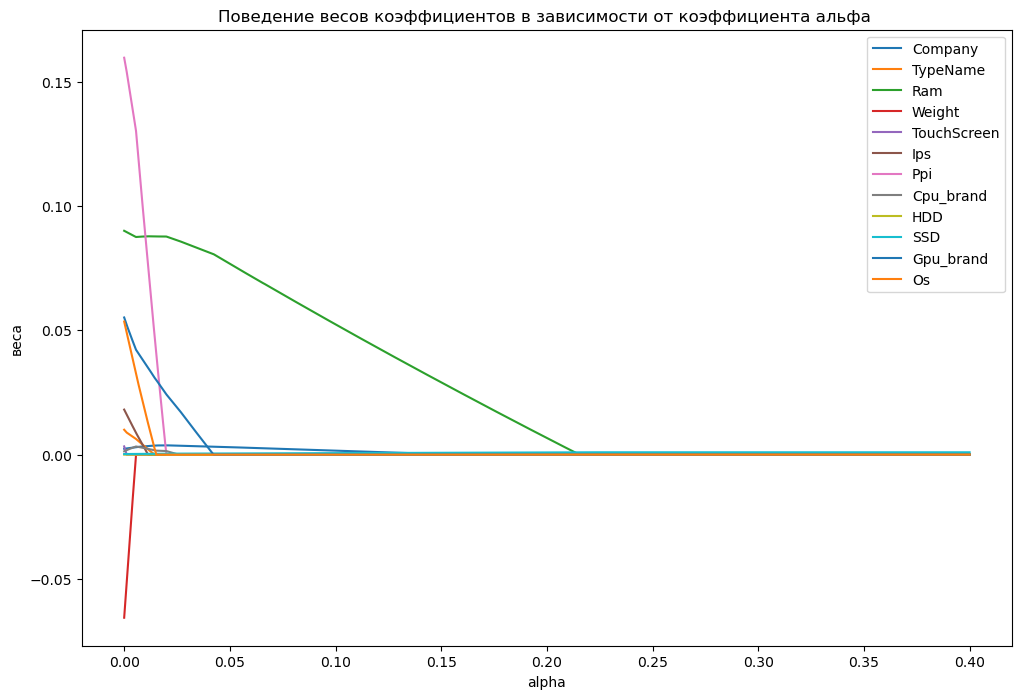

In [50]:
model = ElasticNet()

coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

plt.figure(figsize = (12,8))
ax = plt.gca()

ax.plot(alphas, coefs)
plt.xlabel("alpha")
plt.ylabel("веса")
plt.title("Поведение весов коэффициентов в зависимости от коэффициента альфа ")
plt.legend(X.columns, loc='upper right')
plt.axis("tight")
plt.show();

In [53]:
from sklearn.linear_model import ElasticNetCV
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1s, max_iter=10000)
elastic_cv.fit(X, y);

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.365271243109285, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coord

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.23765424967078, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.236203868991147, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.19069178755051, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.189205597422438, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.048910106721076, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.047309900611836, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.85721343927542, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.855442754385775, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.651546052222557, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.649566513883261, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.421707112728516, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.419452557400197, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.158817176919392, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.156174117373196, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.833420770010978, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.830136062945096, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.417377890003719, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.41285184500452, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.766294849769155, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.75790554338654, tolerance: 0.006270049185841573
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_m

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.12005538521273, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.118676530061574, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.961905998378583, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.960404674296052, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.79060831994579, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.788960270816698, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.601491854100106, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.59966093439986, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.389695977021645, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.387627102399819, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.140277319387604, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.137868053240624, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.01239720575078, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.009780328936921, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.695359286910861, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.692092279860274, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.28296480661043, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.27840350600212, tolerance: 0.006184058197325147
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.3407317017795, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.339432479158857, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.211625168140488, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.210231433305038, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.04548408540474, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.04395763497055, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.86088563626635, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.859193949891925, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.656686488478524, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.654784274322871, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.426763467683381, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.424577672270884, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.16839446710252, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.165807314554241, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.834305621369886, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.831001549740073, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.382775276970374, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.377889499470962, tolerance: 0.006090642691780866
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.576711060683877, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.575294020123534, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/lin

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.43477569469479, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.433263240838956, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/line

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.255229522246935, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.253587311585667, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/lin

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.05953328175536, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.057735895769314, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/line

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.844229214134156, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.842240342209438, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/lin

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.601949427405769, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.599710573124339, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/lin

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.325875292555363, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.323287757456084, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/lin

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.999689703195282, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.996549436710051, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.583508365025516, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.579228567458488, tolerance: 0.0061970515458656394
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.66372643237189, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.662386729799898, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.523675631776154, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.522238807892846, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.351260873028766, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.34969409793472, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.162376583520214, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.16065137370209, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.953031602901913, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.951105563077904, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.719211603528292, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.717018662889302, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.4435987680087, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.441006768715779, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.110954819438975, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.107683822123091, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linea

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.67498621482241, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.670205081145589, tolerance: 0.006114237512440261
  model = cd_fast.enet_coordinate_descent_gram(
/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_m

/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+01, tolerance: 7.724e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [54]:
performance(y_test, y_pred)

MAE: 0.14755039945077303
MSE: 0.032057747121833464
RMSE: 0.1790467735588482
R^2: 0.45540062077014476


In [55]:
elastic_cv.coef_

array([ 2.56516407e-03,  1.05373342e-02,  8.98636370e-02, -5.81347951e-02,
        9.49698716e-03,  2.07420436e-02,  1.29832934e-01,  2.49330339e-03,
       -3.25267733e-06,  2.57144929e-04,  5.29524668e-02,  4.98628102e-02])

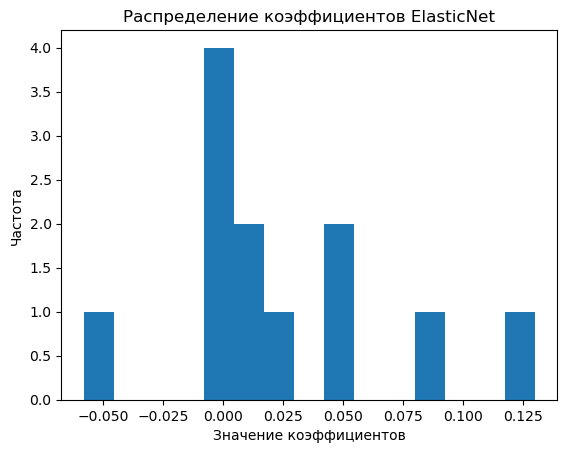

In [56]:
plt.hist(elastic_cv.coef_, bins=15)
plt.title("Распределение коэффициентов ElasticNet")
plt.xlabel("Значение коэффициентов")
plt.ylabel("Частота")
plt.show()

## Bayesian Ridge

In [61]:
from sklearn.linear_model import BayesianRidge, GridSearchCV
br = BayesianRidge()
br.fit(X_train, y_train)

y_pred = br.predict(X_test)
performance(y_test, y_pred)

ImportError: cannot import name 'GridSearchCV' from 'sklearn.linear_model' (/home/maksim/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/__init__.py)

In [62]:
params = {
    'alpha_1': np.logspace(-6, -3, 4),
    'alpha_2': np.logspace(-6, -3, 4),
    'lambda_1': np.logspace(-6, -3, 4),
    'lambda_2': np.logspace(-6, -3, 4),
    'tol': np.logspace(-4, -1, 4),
}

$\alpha_1$ и $\alpha_2$ -- задают форму и масштаб гамма-распределения для $\alpha$, которая контролирует регуляризацию коэффицинтов модели

$\lambda_1$ и $\lambda_2$ -- задают форму и масштаб гамма-распределения для $\lambda$, которая контролирует регуляризацию шума модели

tol -- парамтр допустимой погрешности

In [63]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(br, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_

{'alpha_1': 0.001,
 'alpha_2': 1e-06,
 'lambda_1': 1e-06,
 'lambda_2': 0.001,
 'tol': 0.1}

In [64]:
br = BayesianRidge(compute_score=True, alpha_1=0.001, alpha_2=1e-06, lambda_1=1e-06, lambda_2=0.001, tol=0.1)
br.fit(X_train, y_train)

y_pred = br.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11033394513769726
MSE: 0.01793728556827853
RMSE: 0.1339301518265343
R^2: 0.6952800660499304


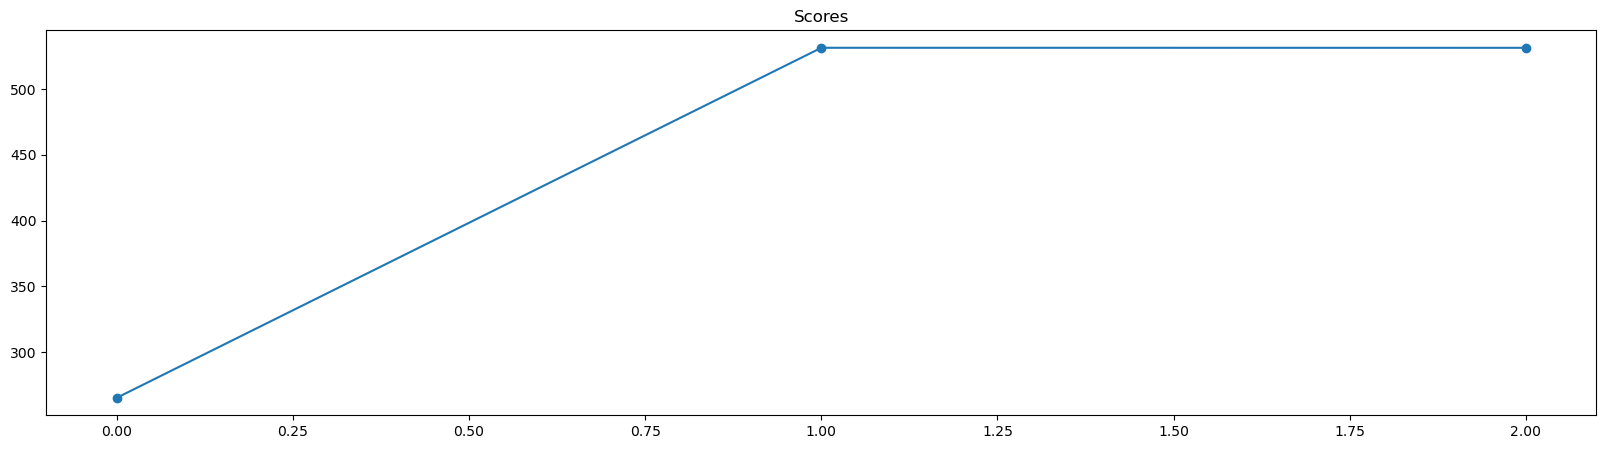

In [65]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(br.scores_,'-o')
plt.title('Scores')
plt.show()

## Bayesian ARD

Каждый признак имеет свой собственный параметр регуляризации. На каждом шаге алгоритма параматры $\alpha_j$ обновляются исходя из текущих коэффициентов $w_j$

In [67]:
from sklearn.linear_model import ARDRegression
ard = ARDRegression(compute_score=True)
ard.fit(X_train, y_train)

y_pred = ard.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11428273625308209
MSE: 0.0197086921185018
RMSE: 0.14038764945144497
R^2: 0.6651872805541504


In [68]:
params = {
    'alpha_1': np.logspace(-6, -2, 4),
    'alpha_2': np.logspace(-6, -2, 4),
    'lambda_1': np.logspace(-6, -2, 4),
    'lambda_2': np.logspace(-6, -2, 4),
    'threshold_lambda': np.logspace(0, 5, 6),
}

threshold_lambda -- значение при котором коэффициент принимает нулевое значение.

In [69]:
grid = GridSearchCV(ard, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_

{'alpha_1': 0.01,
 'alpha_2': 1e-06,
 'lambda_1': 1e-06,
 'lambda_2': 2.1544346900318823e-05,
 'threshold_lambda': 100000.0}

In [71]:
ard = ARDRegression(compute_score=True, alpha_1=0.01, alpha_2=1e-06, lambda_1=1e-06, lambda_2=2.1544346900318823e-05, threshold_lambda=100000.0)
ard.fit(X_train, y_train)

y_pred = ard.predict(X_test)
performance(y_test, y_pred)

MAE: 0.11055107379166818
MSE: 0.017998496087112268
RMSE: 0.1341584737804969
R^2: 0.6942402172285986


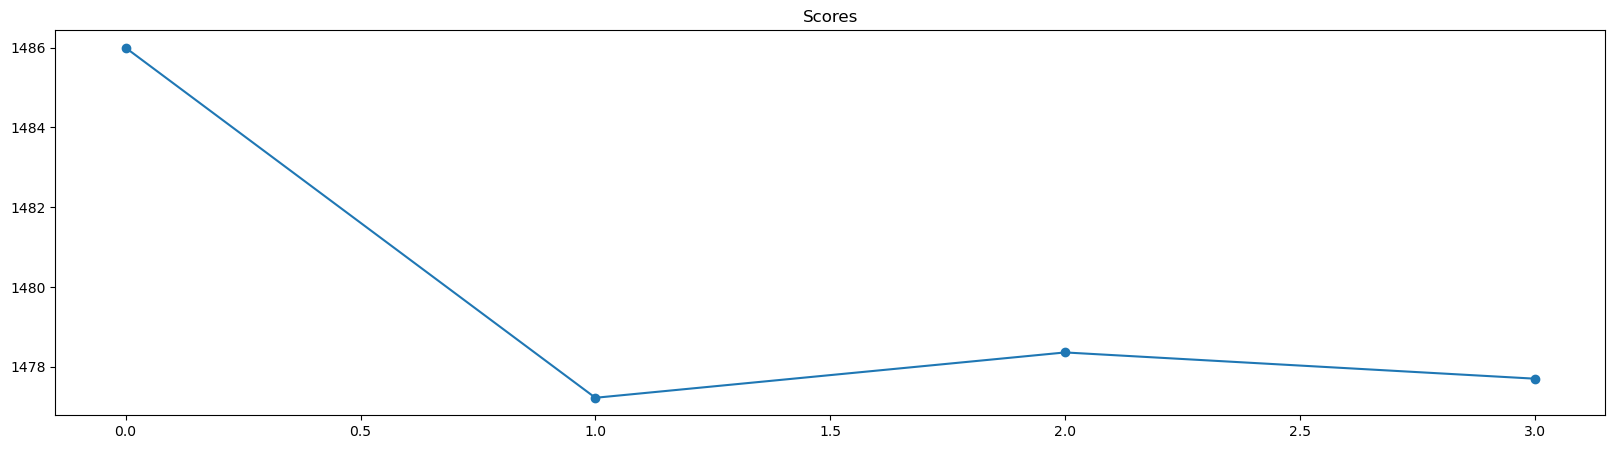

In [72]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(ard.scores_,'-o')
plt.title('Scores')
plt.show()

In [73]:
print(ard.intercept_)
print(ard.coef_)
print(np.min(np.abs(ard.coef_)))
print(np.max(np.abs(ard.coef_)))
print((ard.coef_ == 0).sum())

-0.06624777346134919
[ 2.01873758e-03  9.77729151e-03  8.80538702e-02 -6.35611577e-02
 -4.09935954e-04  1.08692520e-02  1.72451293e-01  1.06445756e-03
  3.58800161e-06  2.40261547e-04  5.89094790e-02  5.95714287e-02]
3.588001606537257e-06
0.17245129272698312
0


## SGD (стохастический градиентный спуск)

In [75]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(random_state=1)
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
performance(y_test, y_pred)

MAE: 122842266704842.42
MSE: 2.4060887747498087e+28
RMSE: 155115723727474.16
R^2: -4.087481406977067e+29


In [76]:
params = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': np.logspace(-6, -1, 6),
    'l1_ratio': np.linspace(0, 1, 11)
}

In [77]:
sgd = SGDRegressor(learning_rate='adaptive')

In [78]:
grid = GridSearchCV(sgd, params, cv=2, scoring='r2')
grid.fit(X_train, y_train)
grid.best_params_

{'alpha': 0.0001, 'l1_ratio': 0.2, 'loss': 'huber', 'penalty': 'l1'}

In [79]:
sgd = SGDRegressor(random_state=1, penalty='l1', loss='huber', alpha=0.0001, l1_ratio=0.2, learning_rate='adaptive')
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)
performance(y_test, y_pred)

MAE: 0.12583730306155197
MSE: 0.025284166224174294
RMSE: 0.15900995636806614
R^2: 0.5704707140617602


## KNN

In [83]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
performance(y_test, y_pred)

MAE: 0.07596188126083189
MSE: 0.010814499563048455
RMSE: 0.10399278611061662
R^2: 0.8162824815376206


In [84]:
scores = []

for i in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=1)
    knn.fit(X_train,y_train);
    scores.append(knn.score(X_test,y_test))

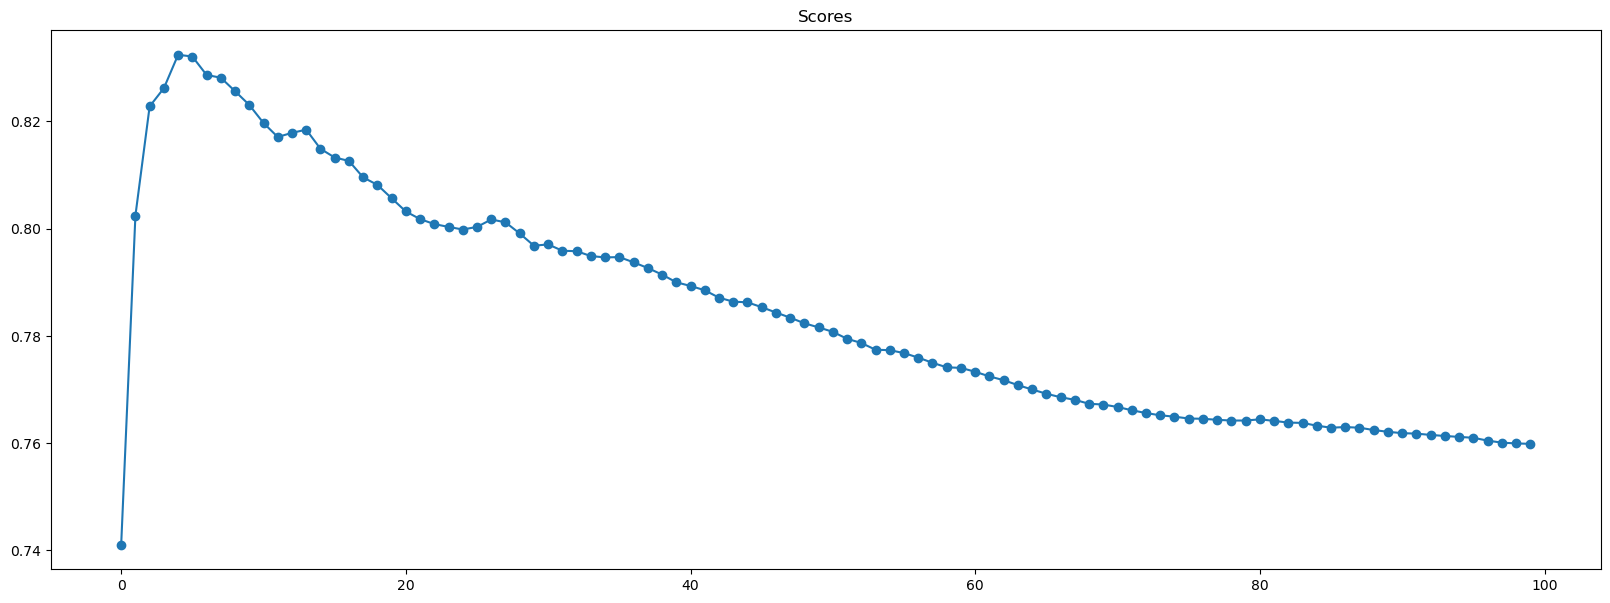

In [85]:
plt.rcParams["figure.figsize"] = (20,7)
plt.plot(scores,'-o')
plt.title('Scores')
plt.show()

In [91]:
knn = KNeighborsRegressor()
index_max = max(range(len(scores)), key=scores.__getitem__)
print(index_max)

4


In [94]:
knn = KNeighborsRegressor(n_neighbors=index_max + 1, metric='manhattan', weights='distance', p=1)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
performance(y_test, y_pred)

MAE: 0.07101277395450764
MSE: 0.0098638395072504
RMSE: 0.09931686416339573
R^2: 0.8324323648802848


## Сравнение моделей

In [96]:
def perf(y_test, y_pred):
    return [mean_absolute_error(y_test, y_pred),
            mean_squared_error(y_test, y_pred),
            np.sqrt(mean_squared_error(y_test, y_pred)),
            r2_score(y_test, y_pred)]

performance_metrics = [
    ['Linear'] + perf(y_test, linear.predict(X_test)),
    ['Lasso'] + perf(y_test, lasso.predict(X_test)),
    ['Ridge'] + perf(y_test, ridge.predict(X_test)),
    ['ElasticNet'] + perf(y_test, el.predict(X_test)),
    ['BayesianRidge'] + perf(y_test, br.predict(X_test)),
    ['BayesianARD'] + perf(y_test, ard.predict(X_test)),
    ['SGD'] + perf(y_test, sgd.predict(X_test)),
    ['KNN'] + perf(y_test, knn.predict(X_test))
]

In [97]:
column_names = ['Algorithm', 'MAE', 'MSE', 'RMSE', 'R^2']
perf_metrics_dict = {name: values for name, *values in zip(column_names, *performance_metrics)}
perf_metrics_df = pd.DataFrame(perf_metrics_dict)
perf_metrics_df['Color'] = sns.color_palette('muted', as_cmap=True)[:len(perf_metrics_df)]
perf_metrics_df

Algorithm       MAE       MSE      RMSE       R^2    Color
0         Linear  0.110610  0.018040  0.134313  0.693535  #4878D0
1          Lasso  0.110397  0.017942  0.133948  0.695200  #EE854A
2          Ridge  0.110610  0.018040  0.134312  0.693539  #6ACC64
3     ElasticNet  0.147550  0.032058  0.179047  0.455401  #D65F5F
4  BayesianRidge  0.110334  0.017937  0.133930  0.695280  #956CB4
5    BayesianARD  0.110551  0.017998  0.134158  0.694240  #8C613C
6            SGD  0.125837  0.025284  0.159010  0.570471  #DC7EC0
7            KNN  0.071013  0.009864  0.099317  0.832432  #797979

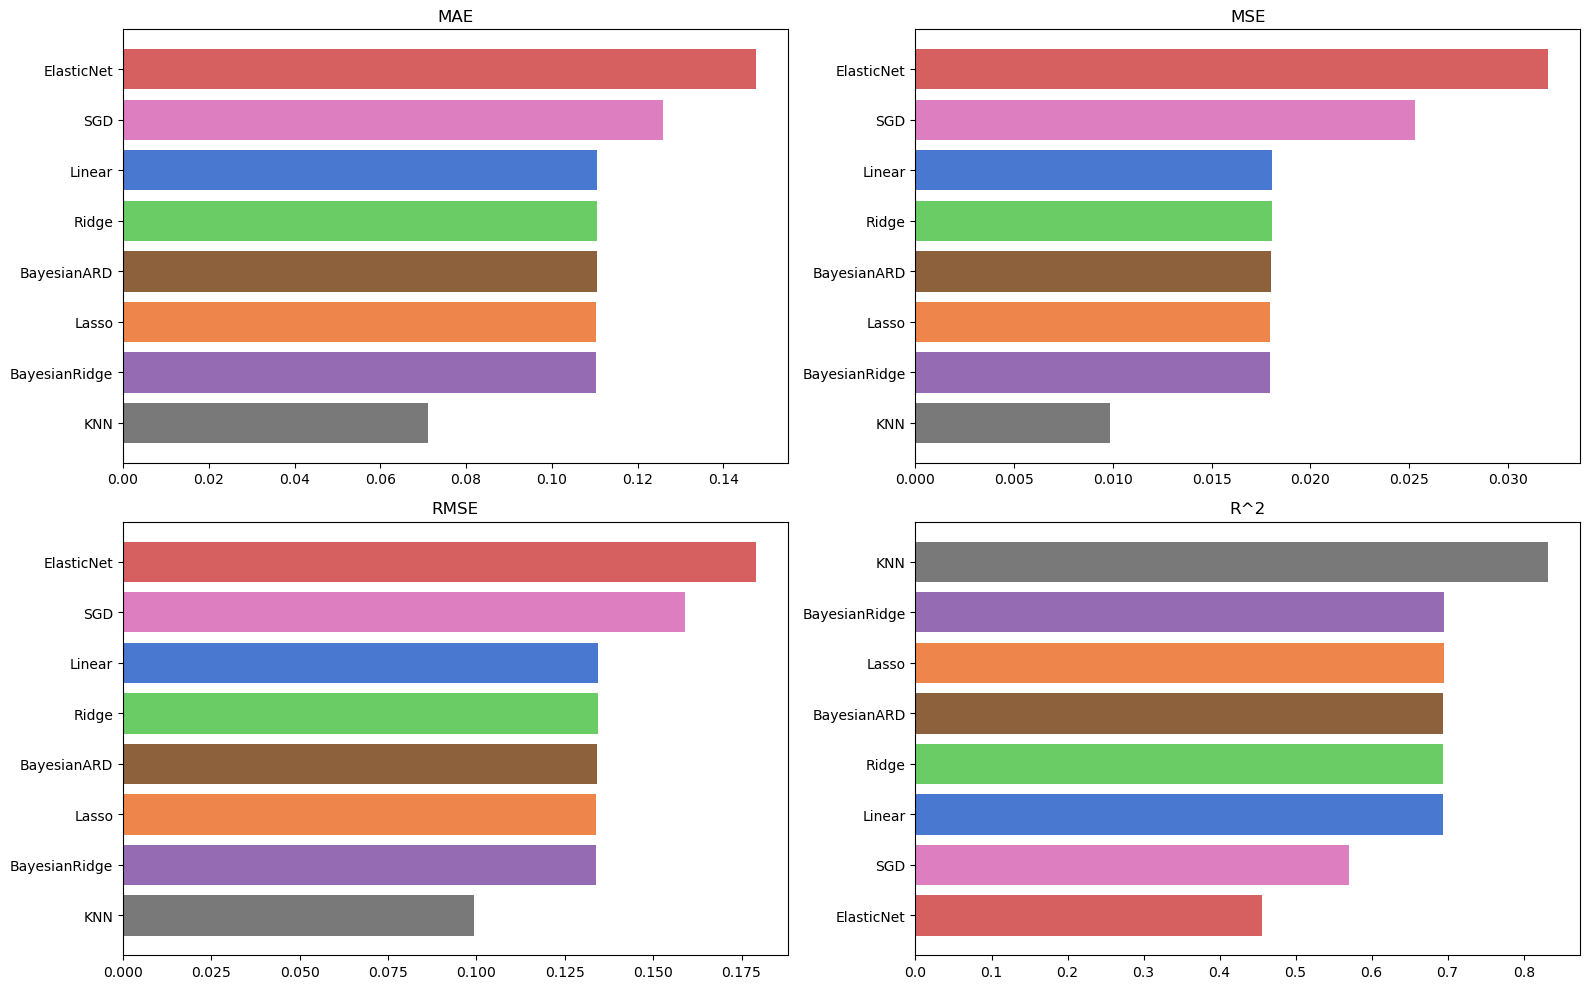

In [98]:
def plot_scores(ax, df, score, name='Algorithm', color_col='Color'):
    ax.barh(df[name], df[score], color=df[color_col])
    ax.set_title(score)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

plot_scores(axes[0, 0], perf_metrics_df.sort_values('MAE'), 'MAE')
plot_scores(axes[0, 1], perf_metrics_df.sort_values('MSE'), 'MSE')
plot_scores(axes[1, 0], perf_metrics_df.sort_values('RMSE'), 'RMSE')
plot_scores(axes[1, 1], perf_metrics_df.sort_values('R^2'), 'R^2')


plt.tight_layout()
plt.show()

## AutoML

In [99]:
from pycaret.regression import *

In [100]:
clf = setup(data = df, target = 'Price', session_id = 1, experiment_name= '1')

In [102]:
best = compare_models(exclude=['lightgbm'])

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [103]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [104]:
elastic_model = create_model('en')
tuned_elastic = tune_model(elastic_model, optimize='r2')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [105]:
print(tuned_elastic)

ElasticNet(alpha=0.38, l1_ratio=0.099, random_state=1)
